<h3 style="text-align:center"><i>Predicting Adware Applications on Android Devices</i></h3>
<hr>
<div style="text-align: center" ><b>AGDEPPA, K.R | BERDON, J | MUSTARD, R.K | TAHOYNON, S.J</b></div>

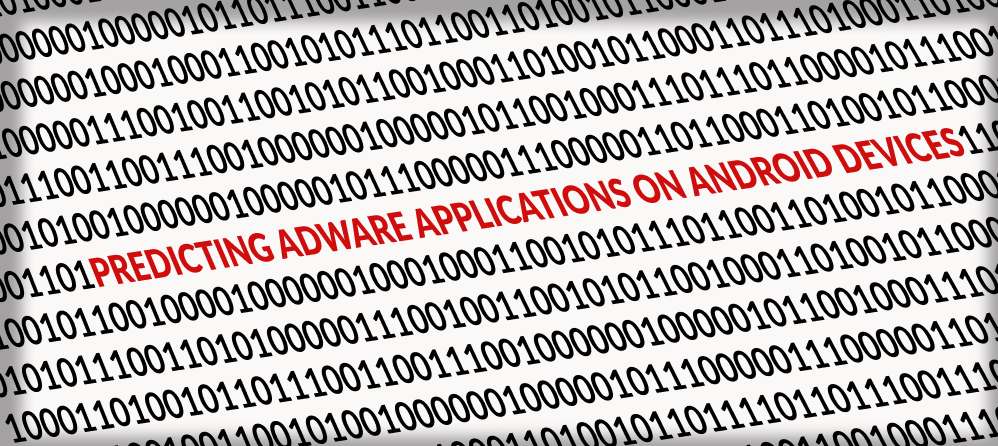

# 1 Executive Summary

The use of smartphones as the primary mode of communication has increased in recent years, making them a target for attackers seeking to obtain confidential data and information through malicious software attacks such as Adware. Adware can pose a significant threat by automatically delivering unwanted advertisements to infected devices, stealing user information, and creating vulnerabilities that allow other malware and adware to be installed. **This project aims to predict adware applications on android devices by designing a machine-learning model that can accurately classify and distinguish adware applications from safe ones.**

Exploratory data analysis reveals an imbalance between adware and benign labels. Specifically, there are 147,443 instances of Adware and only 23,708 instances of benign. Additionally, the standard deviation (std) for the flow duration in benign samples is much higher than that of Adware, indicating that the flow durations are more scattered in benign samples than in Adware samples.

To address the existing class imbalance, researchers employed an undersampling technique provided by scikit-learn. Most labels were undersampled to match the length of the minority label, with resampling set to true and a random state of 42 for consistency. This resulted in the optimization of the model, as shown by the decrease in the PCC (Proportion Chance Criterion) score from 95.1667 to 62.5.

Our information-based classifier (**RandomForestClassifier**) performed best in terms of correctly predicting datapoints in used test set with hyperparameters `max_depth = 100, n_estimators = 100, max_features = 'sqrt'`. Based on the feature importance results, `Source Port` topped the list as the most critical feature that has the greatest impact on the prediction model, followed by `Flow Duration` and `Destination Port: 1st Octet`. Further, the `Flow Duration` was ranked as the most important feature using SHAP (SHapley Additive exPlanations), followed by Source Port.

Overall, the Adware applications are comparable to Benign or Safe Applications which makes it difficult to classify and differentiate one application from the other. However, machine learning techniques have provided distinct features that enable their differentiation. `Flow duration` and `Source Port`, as the top predictors, have proven to be valuable in separating adware applications more clearly, allowing for improved identification and prevention of potentially harmful software.

# 2 Introduction

The use of mobile devices has become a crucial aspect of our daily routines due to the continuous advancements in technology. Android smartphones have notably gained immense popularity since their release in September 2008 (Callaham, 2018). 2019 Android continued to be the world's leading mobile operating system "Laricchia, 2019" with a 71.4% market share. Thanks to hardware advancements, mobile app development has seen significant progress. By September 2019, the Google Play Store had 2.7 million apps, while Apple's App Store had 2.46 million. According to Statistica, the number of mobile devices connected to the internet is expected to reach 20 billion by 2023.

Mobile apps have become essential as e-commerce, e-health, and payments become more accepted through digital transactions. Ads have also transitioned to the digital realm, appearing on websites and mobile applications while browsing. Due to the prevalence of the Android platform, a wide variety of applications are available on most smartphones. This rapid growth has, unfortunately, caused a surge in malicious apps. According to Statistica's report, 97% of 2022 Android applications on the Google Play Store were free in the first quarter of 2023, and the ratio of free to paid apps remained higher than one.

Mobile apps have become essential as digital transactions like e-commerce, eHealth, and payments become more prevalent. Meanwhile, advertisements have gone digital and can be seen while browsing websites or using mobile apps. Most smartphones run on the Android platform, resulting in a vast ecosystem of apps. Despite its rapid expansion, the prevalence of malicious apps is increasing. In the first quarter of 2023, Statistica (2022) reported that 97% of all Android applications were free, surpassing the number of paid apps on the Google Play Store.

The quantity of targeted malicious applications and Potentially Unwanted Applications (PUAs) detected on Android devices has risen annually, with over 50 million affected devices reported. In 2020 alone, 5,683,694 malicious applications were detected by Kaspersky, an anti-malware software company (Kaspersky Lab, 2021). Given Android's substantial market share, the expected growth of malicious applications is concerning.

Adware has also emerged as a common problem on Android devices. Adware is a form of malware that downloads and displays unwanted advertisements, which are often offensive and always unsolicited (Gao et al., 2019). It can lead to crashes, redirect internet searches, and degrade performance. Adware can be classified as either freeware or shareware, and its consequences can range from stealing user information to forcefully displaying advertisements.

Anti-malware software companies are developing practical tools to combat harmful malware, but the dynamic nature of malware and the emergence of adware pose challenges to traditional detection methods. Therefore, a study proposed using Machine Learning to detect adware applications on Android devices to ensure user privacy, boost device performance, and ensure a seamless mobile experience. The study compared several ML algorithms, namely Random Forest (RF), K Nearest Neighbor (KNN), Decision Tree (DT), AdaBoost, and LinearSVC, to identify the best classifier in adware detection based on accuracy.

# 3 Problem Statement and Objective

Android smartphones are widely used, and the fact that Android applications are open-source increases the risk of security breaches. Malware and Potentially Unwanted Applications (PUAs) are rapidly increasing, a significant concern for Android users. Millions of instances have been reported, and the risk is further intensified by adware, a form of advertising software that displays unwanted ads and disrupts the user experience. This creates a twofold issue, where malware and adware significantly threaten user privacy, device performance, and overall user experience. The large number of malicious applications found annually emphasizes the need for proactive measures to detect and prevent these dangers before they cause substantial harm. Additionally, adware deserves attention as it disrupts the user experience and detecting, preventing, and mitigating it is challenging.

With many diverse Android apps, it can be challenging to identify the particular app responsible for adware installation. The lack of effective predictive models and detection methods designed explicitly for adware applications hinders proactive identification and management of adware on Android devices.

Therefore, the project aims to create efficient machine-learning models for adware applications on Android devices. This will specifically design a machine learning model suitable for predicting adware applications, assess its performance metrics, and interpret the features and patterns of the prediction clearly.


# 4 Methodology

To solve problems effectively, it is crucial to comprehend the machine learning pipeline workflow for our project. This process includes data retrieval, data exploration, data preparation, modeling, hyperparameter tuning, model evaluation, and feature analysis.

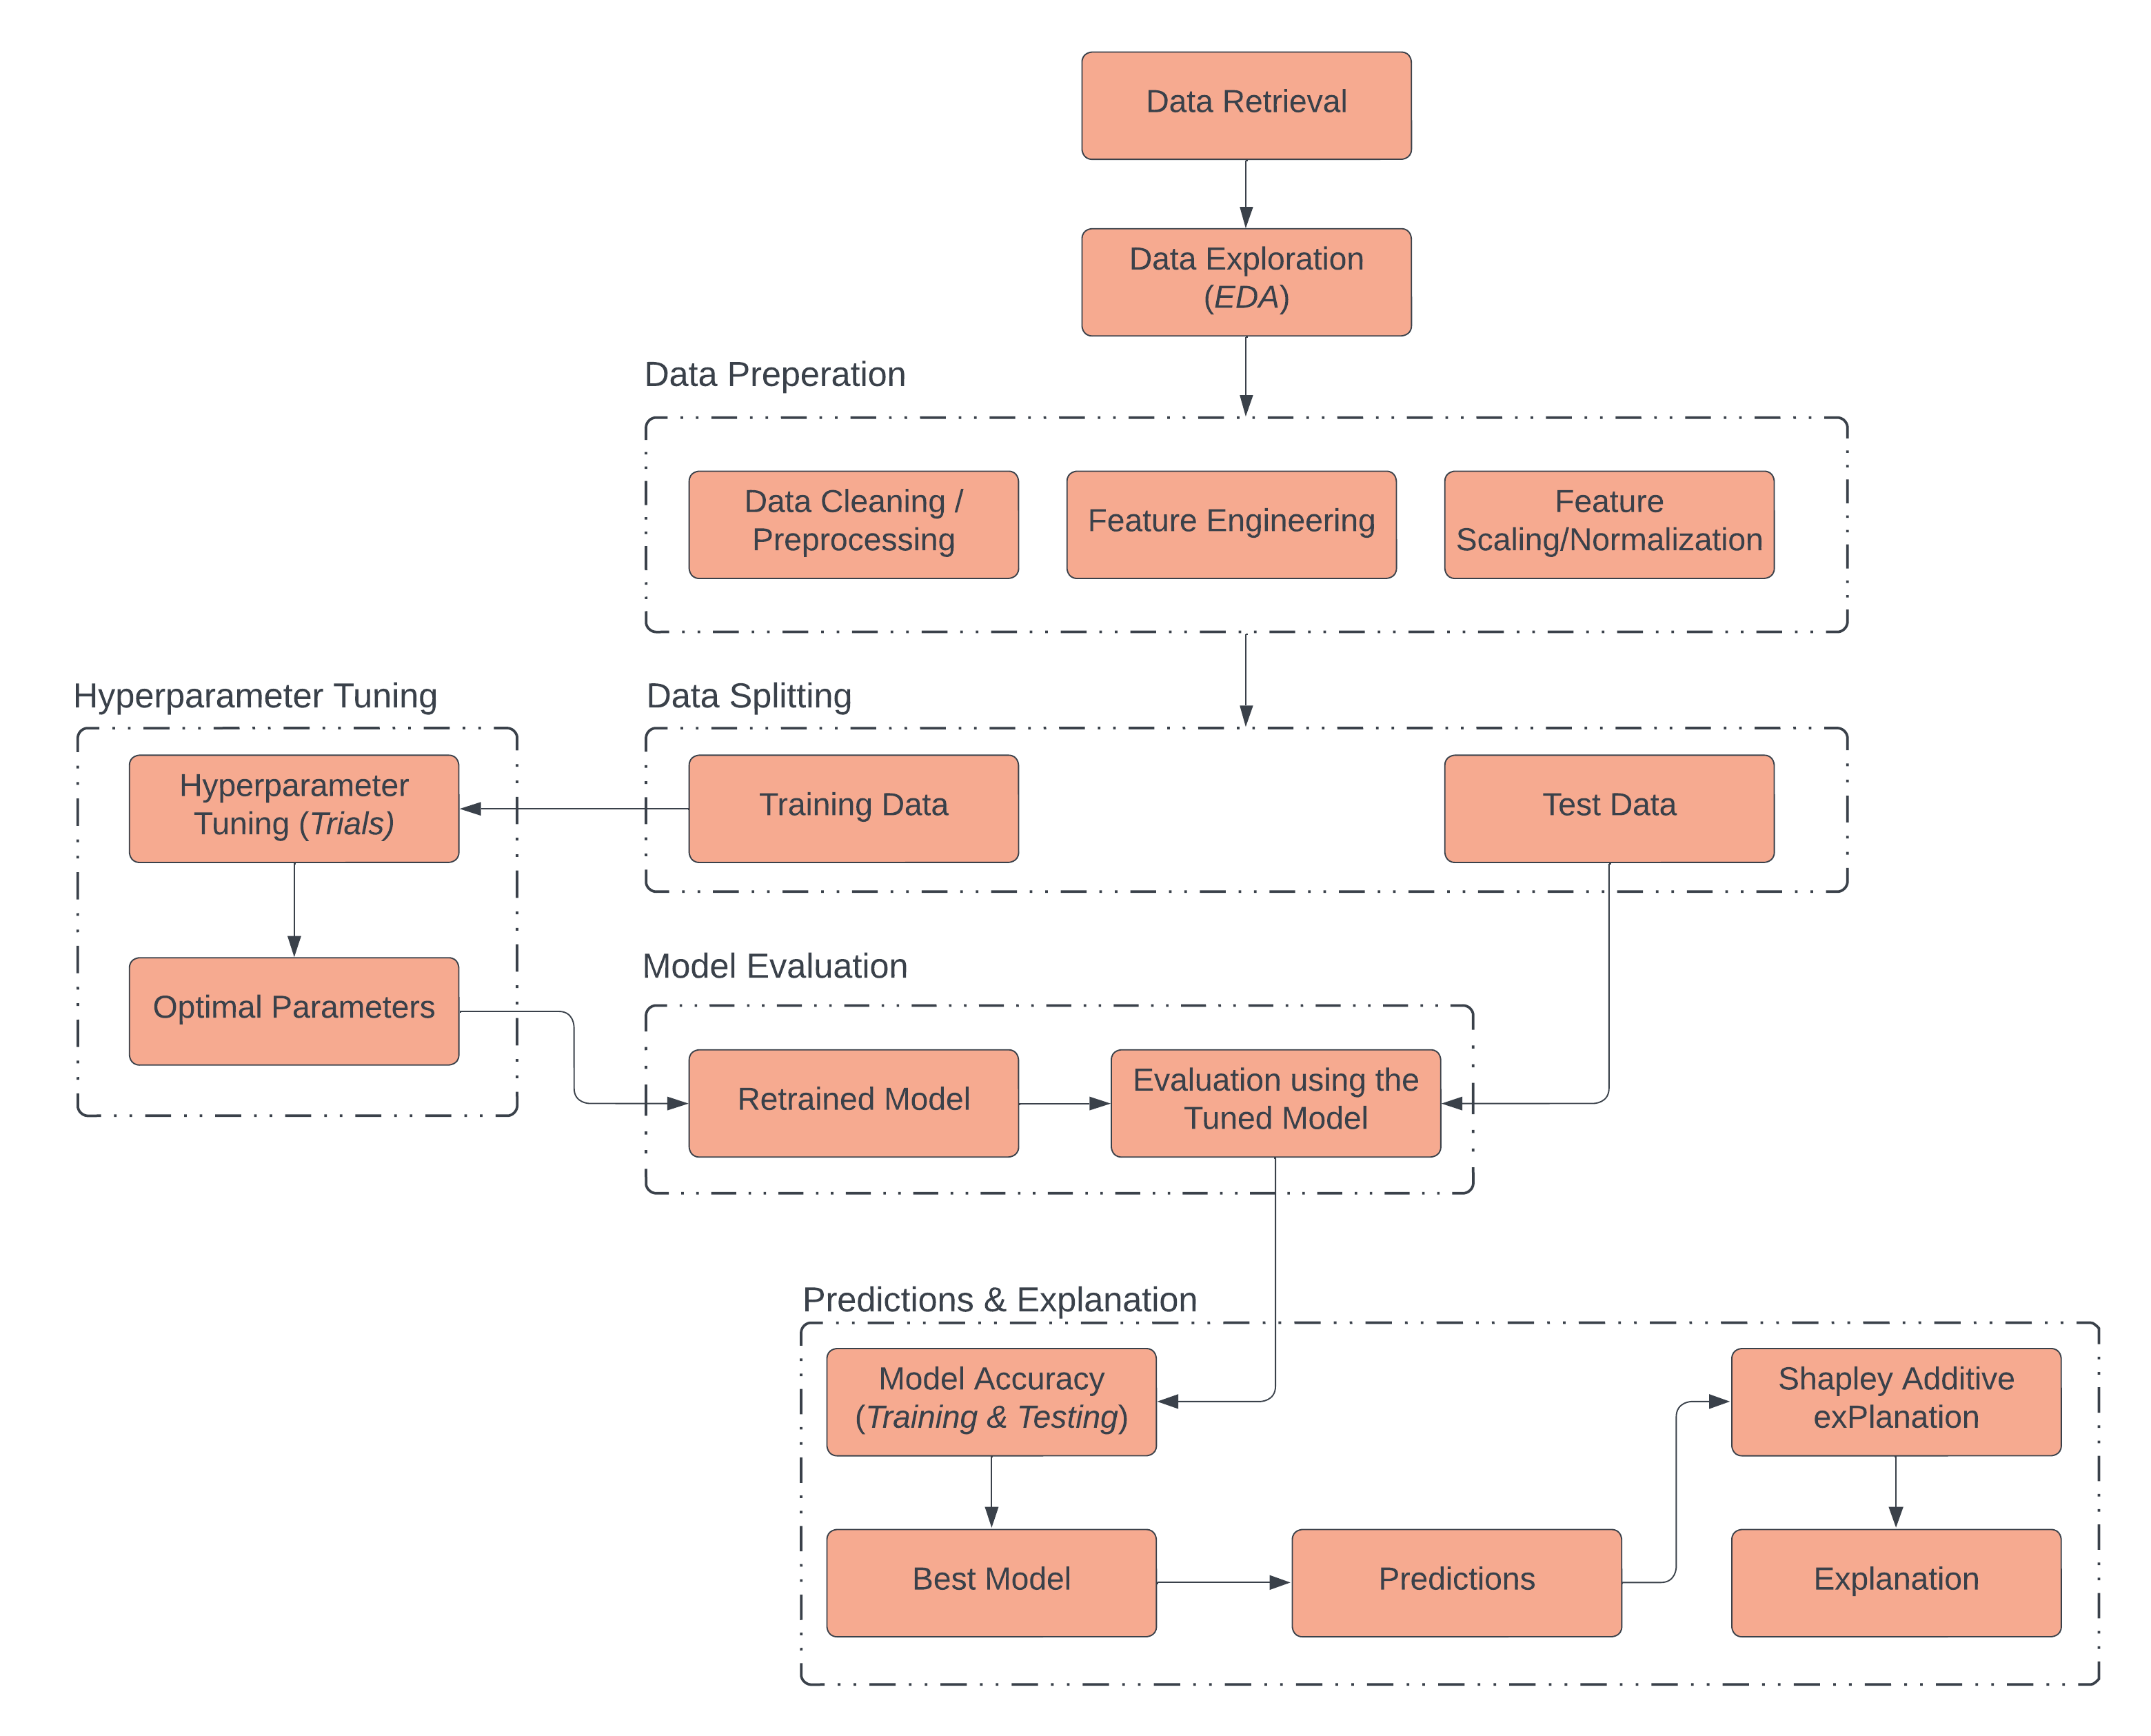

## 4.1 Data Retrival

For this project, we obtained the dataset from Kaggle. It consists of four labels: Android_Adware, Android_Scareware, Android_SMS_Malware, and Benign. The dataset contains 355630 entries with 85 columns, and was obtained from the CIC repository. The current label distribution is as follows: 147443 for Android_Adware, 117082 for Android_Scareware, 67397 for Android_SMS_Malware, and 23708 for Benign. However, the proponents only used Android_Adware and Benign for binary classification, as Android_Adware is one of the most frequently encountered types of malware by users.

| Feature         | Data type     | Definition |
|--------------|-----------|------------|
| Source IP | str      | Refers to the IP address of the source device or sender in the network flow, determining the origin of the network traffic and identify potential sources of adware.        |
| Source Port  | int | Represents the communication endpoint on the sender's side. It helps in identifying the specific application or service sending the packets, providing insights into the type of traffic and identifying potential adware-related behavior.    |
| Destination IP      | str | This feature denotes the IP address of the destination device or receiver in the network flow. It identifies where the network traffic is being sent and potential adware targets.     |
|Destination Port      | float | It is the communication endpoint on the receiver's side which helps in understanding the intended service or application for the received packets. It can also assist in detecting adware-related activities targeting specific ports.    |
|Protocol    | float | This feature indicates the transport layer protocol number, such as TCP (Transmission Control Protocol) or UDP (User Datagram Protocol). It identifies the underlying network protocol used by the traffic. Different protocols may be associated with specific types of network behavior, including potential adware activities.|
| Flow Duration     | int | This is the total duration of a network flow, which is the time elapsed between the first and last packet of the flow. This identifies long-lived flows that might indicate sustained adware activities or abnormal communication patterns.     |

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android-malware-detection/Android_Malware.csv


In [ ]:
# data manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib

# data normalization
from sklearn.preprocessing import MinMaxScaler

# machine learning classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# resampling technique
from sklearn.utils import resample

# ip-address feature engineering
import ipaddress

# miscellaneous
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from collections import Counter
from itertools import product

In [ ]:
# Shapley Additive exPlanation
import shap
shap.initjs()

In [ ]:
df = pd.read_csv(r"/kaggle/input/android-malware-detection/Android_Malware.csv")

In [ ]:
# selecting the features
df = df[[' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol',
       ' Flow Duration', 'Label']]

# selecting the labels that we want to predict
df = df.loc[(df['Label'] == 'Android_Adware') | (df['Label'] == 'Benign')].reset_index(drop=True)

# renaming  the column names
df.rename({" Source IP":"Source IP",
           " Destination IP": "Destination IP",
          " Source Port":"Source Port",
          " Destination Port":"Destination Port",
          " Protocol":"Protocol",
          " Flow Duration":"Flow Duration"}, axis=1, inplace=True)

In [ ]:
df

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Label
0,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,Android_Adware
1,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,Android_Adware
2,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,Android_Adware
3,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,Android_Adware
4,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,Android_Adware
...,...,...,...,...,...,...,...
171146,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,Benign
171147,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,Benign
171148,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,Benign
171149,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,Benign


## 4.2 Data Exploration (*EDA*)

In [ ]:
# check the unique source and destination IP
len(df['Source IP'].unique()), len(df['Destination IP'].unique())

(1589, 2763)

In [ ]:
# check how many protocols are there
df['Protocol'].unique()

array([ 6.,  0., 17.])

In [ ]:
df.duplicated().sum()

21

In [ ]:
df.isna().sum()

Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
Protocol            0
Flow Duration       0
Label               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171151 entries, 0 to 171150
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Source IP         171151 non-null  object 
 1   Source Port       171151 non-null  int64  
 2   Destination IP    171151 non-null  object 
 3   Destination Port  171151 non-null  float64
 4   Protocol          171151 non-null  float64
 5   Flow Duration     171151 non-null  int64  
 6   Label             171151 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.1+ MB


In [ ]:
df.describe().T.style.format('{:,}')

,count,mean,std,min,25%,50%,75%,max
Source Port,"171,151.0","38,786.11774982326","17,840.234351023013",0.0,"34,326.0","42,699.0","51,971.0","65,529.0"
Destination Port,"171,151.0","5,130.198906229002","14,238.781319750155",0.0,80.0,80.0,443.0,"65,401.0"
Protocol,"171,151.0",8.52925194711103,4.686972204272942,0.0,6.0,6.0,6.0,17.0
Flow Duration,"171,151.0","9,819,440.395714896","20,236,283.091432385",1.0,"47,787.5","525,254.0","10,406,903.5","119,999,337.0"


In [ ]:
# android adware statistics
df[df['Label'] == 'Android_Adware'].describe().T.style.format('{:,}')

,count,mean,std,min,25%,50%,75%,max
Source Port,"147,443.0","38,823.4667362981","17,686.757909525288",0.0,"34,373.0","42,645.0","51,838.0","65,529.0"
Destination Port,"147,443.0","5,043.178204458673","14,090.029848955417",0.0,80.0,80.0,443.0,"65,401.0"
Protocol,"147,443.0",8.567799081679022,4.7076010400188455,0.0,6.0,6.0,6.0,17.0
Flow Duration,"147,443.0","9,712,081.543376084","20,066,320.83357513",1.0,"45,891.5","523,699.0","10,362,631.0","119,999,337.0"


In [ ]:
# benign statistics
df[df['Label'] == 'Benign'].describe().T.style.format('{:,}')

,count,mean,std,min,25%,50%,75%,max
Source Port,"23,708.0","38,553.83975873123","18,765.289294022725",0.0,"33,972.0","43,061.0","52,581.0","65,514.0"
Destination Port,"23,708.0","5,671.391471233339","15,120.167592539436",0.0,80.0,443.0,443.0,"65,155.0"
Protocol,"23,708.0",8.289522524042518,4.549353554813278,0.0,6.0,6.0,6.0,17.0
Flow Duration,"23,708.0","10,487,118.448076598","21,251,092.96116854",2.0,"58,413.25","537,273.5","10,500,874.0","119,996,294.0"


**Observations:**

**Source Port:**
- Android Adware: The mean source port value for Android adware samples (38,823.47) is slightly higher than that of benign samples (38,553.84). This suggests a potential variation in source port numbers between Android adware instances and benign traffic.

- Benign: The mean source port value for benign traffic is slightly lower compared to Android adware.

**Destination Port:**
- Android Adware: The mean destination port value for Android adware samples (5,043.18) is slightly lower than that of benign samples (5,671.39). This implies a different pattern in destination port numbers for Android adware instances compared to benign traffic.

- Benign: The mean destination port value for benign traffic is higher compared to Android adware.

**Protocol:**
- Android Adware: The mean protocol value for Android adware samples (8.57) is slightly higher than the mean for benign samples (8.29). This suggests that Android adware instances may use a slightly wider range of protocols compared to benign traffic.

- Benign: The mean protocol value for benign traffic is slightly lower compared to Android adware.

**Flow Duration:**
- Android Adware: The mean flow duration value for Android adware samples (9,712,081.54) is slightly lower than that of benign samples (10,487,118.45). This indicates that Android adware instances tend to have shorter flow durations compared to benign traffic.

- Benign: The mean flow duration for benign traffic is slightly higher compared to Android adware.

**Overall:**
- The count for adware is 147,443, while for benign it is 23,708, indicating an imbalance between these labels.
- The benign standard deviation (std) is much higher compared to adware, especially in terms of flow duration. This suggests that the flow durations of benign samples are more scattered compared to adware.

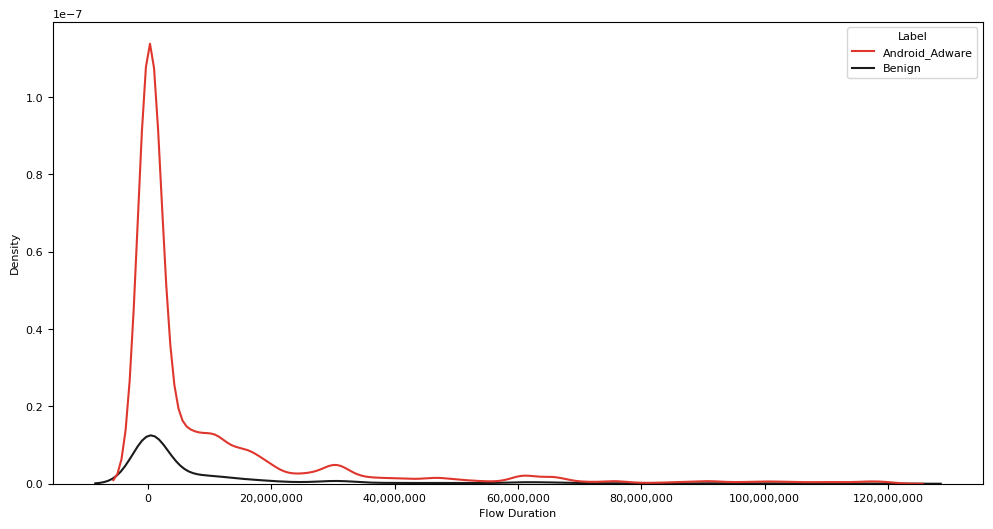

In [ ]:
fig, _ = plt.subplots(figsize=(12,6))
colors = ['#df362d', '#1b1b1b']

matplotlib.rcParams.update({'font.size': 8})

kde = sns.kdeplot(df, x = 'Flow Duration', hue = 'Label', palette = colors)

kde.get_xaxis().set_major_formatter(tick.FuncFormatter(lambda x, _: format(int(x), ',')));

**Observations:**

- The Kernel Density Estimation (KDE) plots for both labels indicate highly skewed distributions in their respective datasets.
- A majority of the data points for both labels have a `Flow Duration` of zero. As the `Flow Duration` increases, the density of data points decreases. However, it is noteworthy that both labels contain instances with a Flow Duration of approximately 120,000,000 seconds. This suggests that even if an Android application contains adware, its `Flow Duration` can be as long as that of a normal Android application.

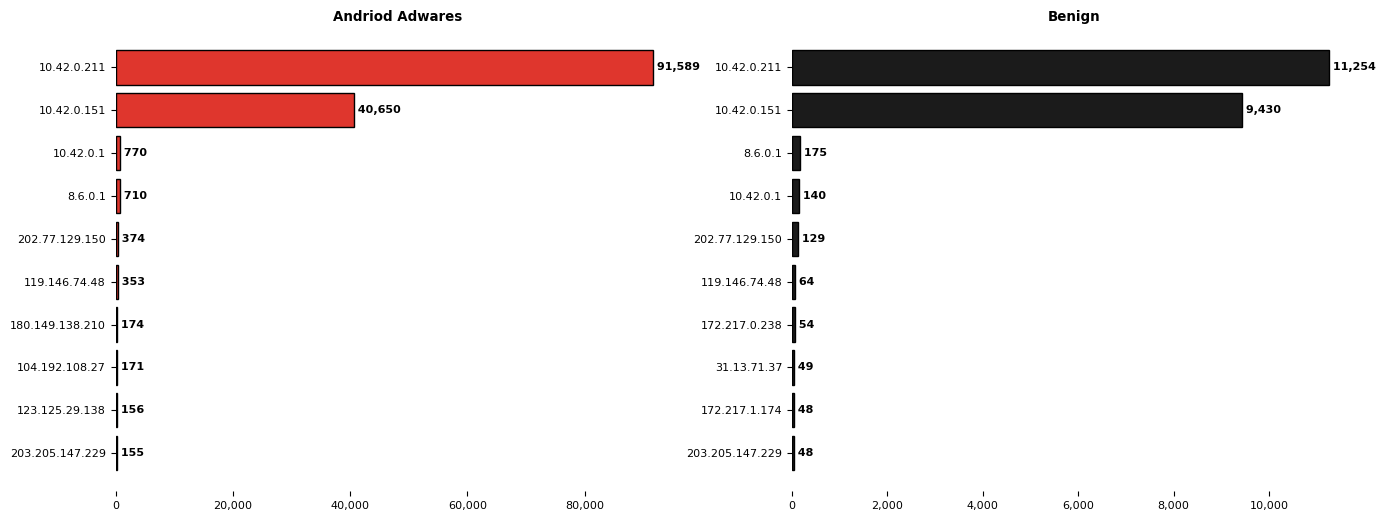

In [ ]:
# declare the variables for the plot
Android_Adware_df = df[['Source IP', 'Label']][df['Label'] == 'Android_Adware'].groupby('Source IP').count().sort_values(by = 'Label', ascending=False).head(10)
Benign_df = df[['Source IP', 'Label']][df['Label'] == 'Benign'].groupby('Source IP').count().sort_values(by = 'Label', ascending=False).head(10)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

dataframes = [Android_Adware_df, Benign_df]
colors = ['#df362d', '#1b1b1b']
list_of_titles = ['Andriod Adwares', 'Benign']

for ax, data, clr, title in zip(axs, dataframes, colors, list_of_titles):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

    # set the horizontal bargraph
    bar_graph = ax.barh(data.index, data['Label'], ec='k', color=clr)

    # add labels in each bar
    container = ax.containers[0]
    ax.bar_label(bar_graph, labels=[f' {x:,.0f}' for x in container.datavalues], fontsize=8, fontweight='bold')

    ax.get_xaxis().set_major_formatter(
      tick.FuncFormatter(lambda x, _: format(int(x), ',')))

    ax.invert_yaxis()

    # set a title for the plot
    ax.set_title(title, fontweight='bold');

**Observations**

- The IP address `10.42.0.211` is the top IP address associated with the transmission of Android applications containing adware. Interestingly, it is also the top source IP for benign applications. The same pattern is observed with the source IP `10.42.0.151`.

- It is noteworthy that several source IP addresses that are known to provide Android adware are also listed as the source of benign applications. Additionally, there are specific IP addresses, such as `172.217.0.238`, `31.13.71.37`, and `172.217.1.174`, that appear in the benign bar plot but are not found among the Android adware providers.

,0
Android_Adware,147443
Benign,23708


1.25 * Proportion Chance Criterion: 95.16677496100776


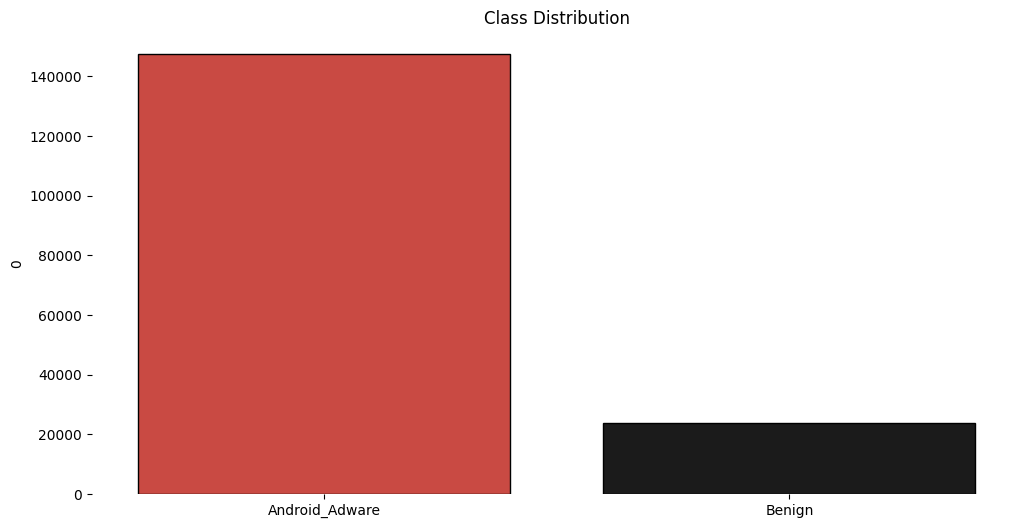

In [ ]:
def target_dist(dataframe_, target_name, PCC = False):
    """
        Calculates the PCC or Proportion Chance Criterion and plots the distribution of the target.

        Parameters
        ------------
        dataframe_ : pandas.core.frame.DataFrame
              the dataframe that contains the categorical features to encode
        target_name : str
              the name of the target to plot
        PCC : bool
              if True, calculates the PCC and prints out the results, if False, it will just plot the distribution

        Returns
        ------------
        None
    """
    state_counts = Counter(dataframe_[target_name])
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')

    fig, axs = plt.subplots(figsize=(12, 6))

    for spine in ['top', 'bottom', 'left', 'right']:
        axs.spines[spine].set_visible(False)

    sns.barplot(x=df_state.index, y=df_state[0], palette = ['#df362d', '#1b1b1b'], ec='k')
    plt.title("Class Distribution")

    if PCC:
        df = pd.DataFrame()
        num = (df_state[0]/df_state[0].sum())**2

        display(df_state)
        print(f"1.25 * Proportion Chance Criterion: {1.25*100*num.sum()}")



target_dist(df, 'Label', PCC = True)

*As mentioned earlier, there is an existing class imbalance between the two labels, ```Android_Adware``` appears more than ```Benign```, in which resulted to a high PCC (Proportion Chance Criterion) which is **95.1667**.*

## 4.3 Data Preparation

### 4.3.1 Data Cleaning/Preprocessing

,0
Android_Adware,23708
Benign,23708


1.25 * Proportion Chance Criterion: 62.5


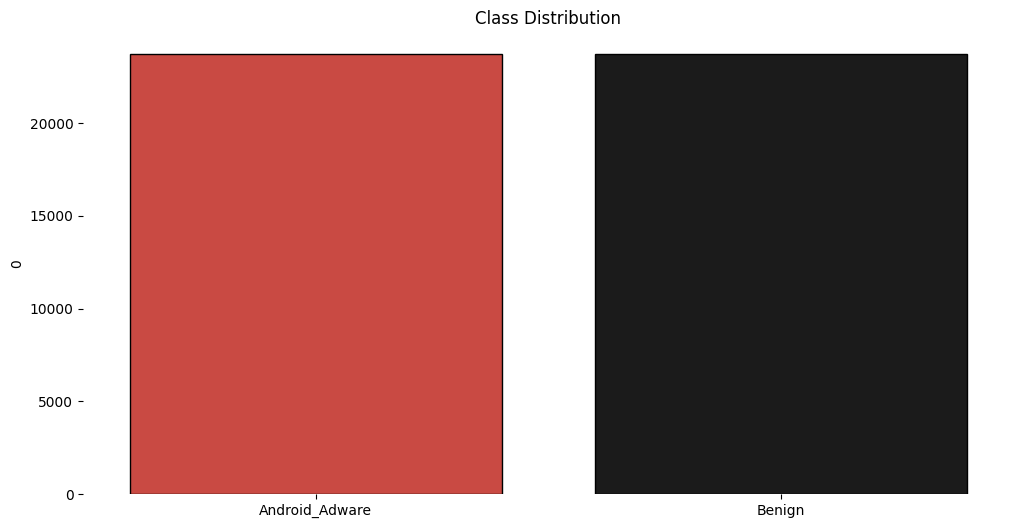

In [ ]:
# selecting the majority label and the minority label
df_majority = df[df['Label'] == 'Android_Adware']
df_minority = df[df['Label'] == 'Benign']

# undersampling the majority
df_majority_undersampled = resample(df_majority,
                                 replace = True, # sample with replacement
                                 n_samples = len(df_minority), # to match MINORITY class
                                 random_state = 42) # reproducible results

# Combine the undersampled majority class with minority class
df = pd.concat([df_majority_undersampled, df_minority], ignore_index = True)

target_dist(df, 'Label', PCC = True)

*In order for the model to be optimal, the researchers preprocessed the labels by using an undersampling technique provided by scikit-learn. The majority and minority label were selected and undersampled the majority label using the ```resample``` to match the length of the minority label, with replacement set to true and random state equals to 42 to maintain randomicity. As a result, the researchers have lowered the PCC score from **95.1667** to **62.5**.*

In [ ]:
# mapping out the protocol numbers to their actual names
df['Protocol'] = df['Protocol'].map({0:'HOPOPT', 6:'TCP', 17:'UDP'})

# One-hot encoding our nominal feature
protocols_df = pd.get_dummies(df['Protocol'])

# concatinate the two dummy features from one hot encoding and drop the protocol
df = pd.concat([df, protocols_df[['TCP', 'UDP']]], axis=1).drop('Protocol', axis=1)

In [ ]:
df

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Label,TCP,UDP
0,10.42.0.211,53337,64.71.142.96,80.0,4776440,Android_Adware,1,0
1,10.42.0.211,43442,66.231.239.120,443.0,11336717,Android_Adware,1,0
2,10.42.0.211,55089,180.149.134.142,80.0,510346,Android_Adware,1,0
3,10.42.0.211,40331,172.217.1.110,443.0,112662245,Android_Adware,1,0
4,10.42.0.211,38504,104.233.222.135,7017.0,81811,Android_Adware,1,0
...,...,...,...,...,...,...,...,...
47411,172.217.7.14,80,10.42.0.211,38405.0,126711,Benign,1,0
47412,10.42.0.211,7632,10.42.0.1,53.0,48012,Benign,0,1
47413,10.42.0.211,45970,104.192.110.245,443.0,20028018,Benign,1,0
47414,10.42.0.211,51982,10.42.0.1,53.0,347926,Benign,0,1


In [ ]:
# transforming our dependent variable using map function; 'Benign'=0 and 'Android_Adware'=1
print(df['Label'].unique())
df['Label'] = df['Label'].map({'Benign':0, 'Android_Adware':1})
print(df['Label'].unique())

['Android_Adware' 'Benign']
[1 0]


### 4.3.2 Feature Extraction/Engineering

In [ ]:
"""
  Since feature ```Source IP``` can be identified as either private and public ip addresses
  we created a new feature called ```is Source IP private/public``` a new binary feature
  that tells if the feature ```Source IP``` is private or public. private = 1 and public = 0.
"""

df['is Source IP private/public'] = np.array(int(ipaddress.ip_address(i).is_private) for i in df['Source IP'])

# descriptive statistics about the feature ```is Source IP private/public```
df['is Source IP private/public'], df['is Source IP private/public'].unique(), Counter(df['is Source IP private/public'])

(0        1
 1        1
 2        1
 3        1
 4        1
         ..
 47411    0
 47412    1
 47413    1
 47414    1
 47415    1
 Name: is Source IP private/public, Length: 47416, dtype: object,
 array([1, 0], dtype=object),
 Counter({1: 42169, 0: 5247}))

In [ ]:
def ip_extraction(dataframe_, feature):
    """
        extracts the 4 octetes from the ip-addresses (v4)

        Parameters
        ------------
        dataframe_ : pandas.core.frame.DataFrame
                the dataframe that contains the categorical features to encode
        feature : str
                the name of the feature that contains the ip-addresses

        Returns
        ------------
        dataframe_ : pandas.core.frame.DataFrame
                the dataframe in which contains all the ip octets of dataframe_[feature]
    """
    list_of_octets = ['1st Octet', '2nd Octet', '3rd Octet', '4th Octet']

    for index, octet in enumerate(list_of_octets):
        dataframe_[f"{feature}:{octet}"] = [values.split(".")[index] for values in dataframe_[feature]]

    dataframe_ = dataframe_.drop(feature, axis=1)
    return dataframe_

for ip_name in ['Source IP', 'Destination IP']:
    df = df.pipe(ip_extraction, ip_name)

df

,Source Port,Destination Port,Flow Duration,Label,TCP,UDP,is Source IP private/public,Source IP:1st Octet,Source IP:2nd Octet,Source IP:3rd Octet,Source IP:4th Octet,Destination IP:1st Octet,Destination IP:2nd Octet,Destination IP:3rd Octet,Destination IP:4th Octet
0,53337,80.0,4776440,1,1,0,1,10,42,0,211,64,71,142,96
1,43442,443.0,11336717,1,1,0,1,10,42,0,211,66,231,239,120
2,55089,80.0,510346,1,1,0,1,10,42,0,211,180,149,134,142
3,40331,443.0,112662245,1,1,0,1,10,42,0,211,172,217,1,110
4,38504,7017.0,81811,1,1,0,1,10,42,0,211,104,233,222,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47411,80,38405.0,126711,0,1,0,0,172,217,7,14,10,42,0,211
47412,7632,53.0,48012,0,0,1,1,10,42,0,211,10,42,0,1
47413,45970,443.0,20028018,0,1,0,1,10,42,0,211,104,192,110,245
47414,51982,53.0,347926,0,0,1,1,10,42,0,211,10,42,0,1


The term octet string refers to a collection of any number of related octets.
Octet strings are commonly found in Internet protocol (IP) addressing, in which the four bytes of an IPv4 address consist of four octets. In dotted-decimal notation, an IP address appears as [octet].[octet].[octet].[octet], as in 192.168.0.1. (Mitchell, B., 2021)

### 4.3.3 Feature Normalization

In [ ]:
def normalize_splits(dataframe, test_size_, random_state_, X, y):
    """
      it normalizes only the continous feature in the dataframe using MinMaxScaler.

      Parameters
      ------------
      dataframe : pandas.core.frame.DataFrame
          the dataframe to be normalized

      test_size_ : float
          the test size for train_test_split

      random_state_ : int
          random state for train_test_split

      X : pandas.core.frame.DataFrame
          a pandas dataframe that contains all the features

      y : pandas.core.frame.DataFrame
          a pandas dataframe that contains the target or dependent variable

      Returns
      ------------
      scaled_splits : tuple
          returns the dataframe with the X and y splitted and normalized

      unscaled_splits : list
          returns the dataframe with the X and y splitted and NOT normalized

    """

    scaler_ = MinMaxScaler()

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = test_size_,
                                                    random_state = random_state_,
                                                    stratify = y)

    continous_features = ['Source Port', 'Destination Port', 'Flow Duration', 'Source IP:1st Octet',
       'Source IP:2nd Octet', 'Source IP:3rd Octet', 'Source IP:4th Octet',
       'Destination IP:1st Octet', 'Destination IP:2nd Octet',
       'Destination IP:3rd Octet', 'Destination IP:4th Octet']

    scaler_.fit(X_train[continous_features])

    X_train_scaled = scaler_.transform(X_train[continous_features])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = continous_features)

    X_train_scaled = pd.concat([X_train_scaled, X_train[['TCP', 'UDP', 'is Source IP private/public']].reset_index(drop=True)], axis=1)

    X_test_scaled = scaler_.transform(X_test[continous_features])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = continous_features)

    X_test_scaled = pd.concat([X_test_scaled, X_test[['TCP', 'UDP', 'is Source IP private/public']].reset_index(drop=True)], axis=1)

    scaled_splits = (X_train_scaled, X_test_scaled, y_train, y_test)
    unscaled_splits = [X_train, X_test, y_train, y_test]
    return scaled_splits, unscaled_splits

## 4.4 Data Splitting

In [ ]:
X = df[['Source Port', 'Destination Port', 'Flow Duration', 'TCP',
       'UDP', 'is Source IP private/public', 'Source IP:1st Octet',
       'Source IP:2nd Octet', 'Source IP:3rd Octet', 'Source IP:4th Octet',
       'Destination IP:1st Octet', 'Destination IP:2nd Octet',
       'Destination IP:3rd Octet', 'Destination IP:4th Octet']]

y = df['Label']

(X_train, X_test, y_train, y_test), unscaled_splits = df.pipe(normalize_splits, 0.25, 42, X, y)

## 4.5 Hyperparameter Tuning

### 4.5.1 Hyperparameter Tuning *(Trials)*

In [ ]:
def trials_calculator(test_model, trials = 50):
    """
        Calculates the accuracy of the ```test_model``` and its hyperparameter for n trials.

        Parameters
        ------------
        test_model : sklearn.base.BaseEstimator
              the sklearn model that will be used for validation for n trials

        trials : range or list or tuple or set; default = 50
              the number of trials to validate the ```test_model```

        Returns
        ------------
        final_results : list
              a list that contains two values of dictionary, the first value
              contains the results of train accuracy, the second value contains the results of test accuracy
    """
    final_train_accuracy = {}
    final_test_accuracy = {}

    trial_train_accuracy = []
    trial_test_accuracy = []

    for _ in range(trials):
        # validation set
        X_train_, X_val, y_train_, y_val = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.35,
                                                            random_state = None,
                                                            stratify = y_train)

        # fit the train data from validation set
        test_model.fit(X_train_, y_train_)

        # calculte the train and validation scores
        train_score = test_model.score(X_train_, y_train_)
        test_score = test_model.score(X_val, y_val)

        # append the results
        trial_train_accuracy.append(train_score)
        trial_test_accuracy.append(test_score)


    # append the scores of train and test
    final_train_accuracy['train'] = np.round(np.mean(trial_train_accuracy), 4)
    final_test_accuracy['test'] = np.round(np.mean(trial_test_accuracy), 4)

    final_results = [final_train_accuracy, final_test_accuracy]

    return final_results

def param_combinations(*params):
    """
        Calculates and returns the possible combinations of values inside the tuple.

        Parameters
        ------------
        params : tuple
              the tuple that contains the list of hyperparameters

        Returns
        ------------
        permutations : list
              a list that contains tuples of possible hyperparemeter combinations
    """
    permutations = list(product(*params))
    return permutations


def model_eval(model, param, show_plot = True, show_data = False):
    """
      Performs a hyperparemeter tuning technique similar to GridSearchCV that utilizes the all possible combinations of hyperparameters;
      the complexity of this function is based on how many hyperparameters are passed. For instance, if 'n_neighbors' = range(10) and 'p' = [1, 2]
      the number of processes would be 10*2.

      Parameters
      ------------
      model : str
            the type of model to be used, either 'KNeighborsClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'LinearSVC', 'RandomForestClassifier'
      param : dict
            a dict of parameters to tune based on the model

      Returns
      ------------
      highest_test_results : pandas.core.series.Series
            a row from results that contains the highest test accuracy from results data frame
    """
    # valid models to tune
    models_ = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'LinearSVC', 'RandomForestClassifier']

    # the pandas dataframe to store the train and test accuracy from each hyperparameter combination
    results = pd.DataFrame()

    # check if the argument for parameter ```model``` is valid and in the list ```models_``` if not return assertion
    assert model in models_, "model type must be either of the five: {}, {}, {}, {}, {}".format(*models_)


    # determine what type of model is passed
    if model == 'KNeighborsClassifier':

        # creates columns in ```results``` dataframe based on what parameters to test, since this is KNN, columns for n_neighbors, p and weights are created
        results['n_neighbors'], results['p'], results['weights'], results['train accuracy'], results['test accuracy'] = [], [], [], [], []

        # calls the function ```param_combinations``` to calculate all the combinations of the hyperparameters that we want to tune
        for n_neighbors_, p_, weight in tqdm(param_combinations(*list(param.values())), position=0, leave=True):

            test_model_ = KNeighborsClassifier(n_neighbors=n_neighbors_, p=p_, weights = weight, n_jobs=-1)

            # after the ```test_model_``` has been set, we call the function ```trials_calculator``` to perform calculate the train and validation accuracy
            params_result = trials_calculator(test_model_)

            # after the calculation we can now append the hyperparameters that we used to the columns that we created
            results = results.append({'n_neighbors':n_neighbors_,
                          'p':p_,
                          'weights':weight,
                          'train accuracy':params_result[0]['train'],
                          'test accuracy':params_result[1]['test']},
                         ignore_index=True)


    elif model == 'LinearSVC':
        results['C'], results['train accuracy'], results['test accuracy'] = [], [], []

        # in this example, we no longer need call the function ```param_combinations``` since we are only testing one (1) parameter
        for c_ in tqdm(list(param.values())[0], position=0, leave=True):
            test_model_ = LinearSVC(C = c_)
            params_result = trials_calculator(test_model_)

            results = results.append({'C':c_,
                                      'train accuracy':params_result[0]['train'],
                                      'test accuracy':params_result[1]['test']},
                                     ignore_index=True)


    elif model == 'DecisionTreeClassifier':
        results['max_depth'], results['train accuracy'], results['test accuracy'] = [], [], []

        for max_d in tqdm(list(param.values())[0], position=0, leave=True):
            test_model_ = DecisionTreeClassifier(max_depth = max_d, criterion = 'entropy')
            params_result = trials_calculator(test_model_)

            results = results.append({'max_depth':max_d,
                              'train accuracy':params_result[0]['train'],
                              'test accuracy':params_result[1]['test']},
                             ignore_index=True)


    elif model == 'AdaBoostClassifier':
        results['learning_rate'], results['n_estimators'], results['train accuracy'], results['test accuracy'] = [], [], [], []

        for lr_, num_estimator in tqdm(param_combinations(*list(param.values())), position=0, leave=True):
            test_model_ = AdaBoostClassifier(learning_rate = lr_, n_estimators = num_estimator)
            params_result = trials_calculator(test_model_)

            results = results.append({'learning_rate':lr_,
                                      'n_estimators':num_estimator,
                                      'train accuracy':params_result[0]['train'],
                                      'test accuracy':params_result[1]['test']},
                                     ignore_index=True)

    elif model == 'RandomForestClassifier':
        results['max_depth'], results['n_estimators'], results['max_features'], results['train accuracy'], results['test accuracy'] = [], [], [], [], []

        for max_d, num_estimator, max_f in tqdm(param_combinations(*list(param.values())), position=0, leave=True):
            test_model_ = RandomForestClassifier(n_estimators = num_estimator, max_depth = max_d, max_features = max_f, criterion = 'entropy', n_jobs=-1)
            params_result = trials_calculator(test_model_)

            results = results.append({'max_depth':max_d,
                                      'n_estimators':num_estimator,
                                      'max_features':max_f,
                                      'train accuracy':params_result[0]['train'],
                                      'test accuracy':params_result[1]['test']},
                                     ignore_index=True)

    if show_data:
        display(results)

    if show_plot:
        fig, axs = plt.subplots(figsize=(15, 8))

        # remove the spines of from the chart
        for s in ['top', 'right', 'bottom', 'left']:
            axs.spines[s].set_visible(False)

        plt.title(f"Hyperparameter Tuning Results for {model}")

        plt.xlabel("Model Number", fontsize=12)
        plt.ylabel("Accuracy", fontsize=12)

        plot_xaxis = results.index

        plt.plot(plot_xaxis, results['train accuracy'], color = "#df362d", marker=".", linestyle='--', label = "train accuracy")
        plt.plot(plot_xaxis, results['test accuracy'], color = "#1b1b1b", marker=".", label = "validation accuracy")

        plt.xticks(plot_xaxis)

        plt.legend()
        plt.show()

    print()
    print("Highest Test Accuracy")

    # returns the row that has the highest validation/test accuracy from the data frame results
    highest_test_results = results.loc[results['test accuracy'].idxmax()]
    return highest_test_results

100%|██████████| 24/24 [1:11:05<00:00, 177.74s/it]


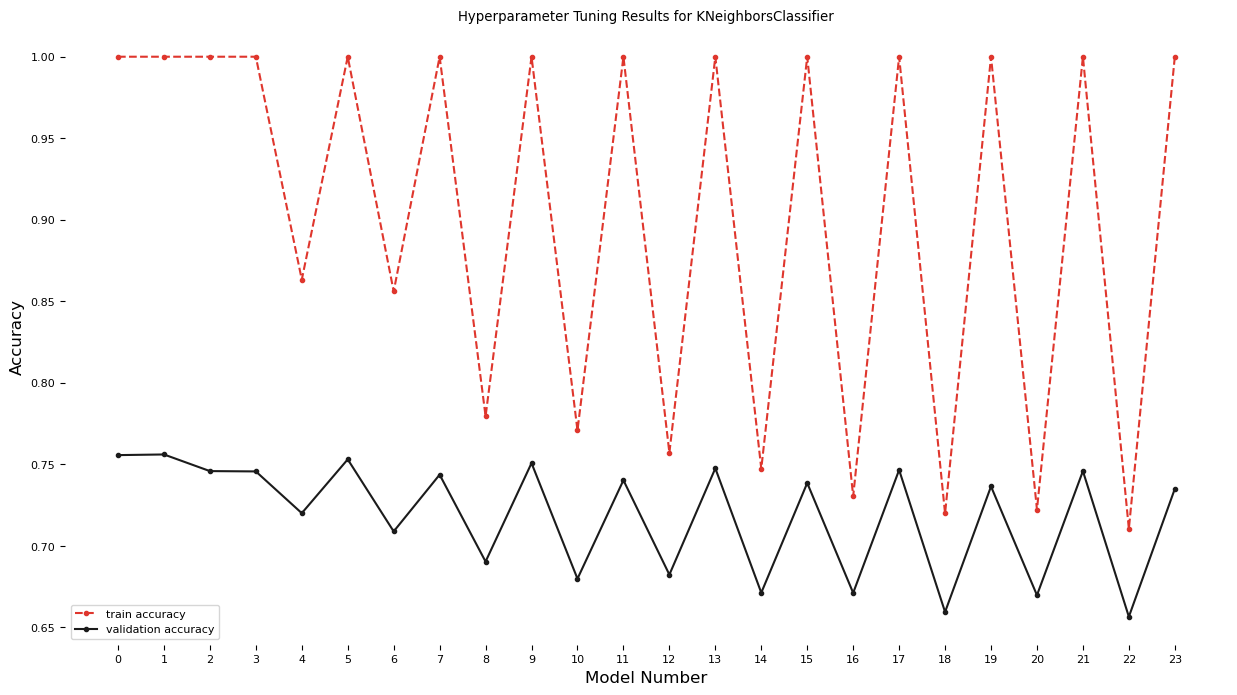


Highest Test Accuracy


n_neighbors            1.0
p                      1.0
weights           distance
train accuracy         1.0
test accuracy       0.7561
Name: 1, dtype: object

In [ ]:
hyperparameters = {'n_neighbors': [1, 3, 6, 9, 12, 15],
                   'p': [1, 2],
                   'weights':['uniform', 'distance']}

model_eval('KNeighborsClassifier', hyperparameters)

<hr>

**K Nearest Neighbor**

The researchers tested several hyperparameters for KNN, which include `n_neighbors`, `p`, and `weight`. Since multiple parameters were tested, the number of models corresponds to the number of hyperparameter combinations tested. Upon analyzing the plot above, it is evident that one particular hyperparameter significantly affects the train accuracy, causing it to drop below 0.8. To further investigate this hyperparameter, one can set `show_data = True` when calling the `model_eval` function. Additionally, the combination of hyperparameters that resulted in the highest validation/test accuracy was `n_neighbors = 1`, `p = 1`, and `weights = distance`, achieving a train accuracy of 1.0 and a validation/test accuracy of 0.7561. This indicates clear overfitting, as the model fails to generalize. To evaluate the final model, the optimal hyperparameter setting will be tested.

100%|██████████| 4/4 [01:22<00:00, 20.66s/it]


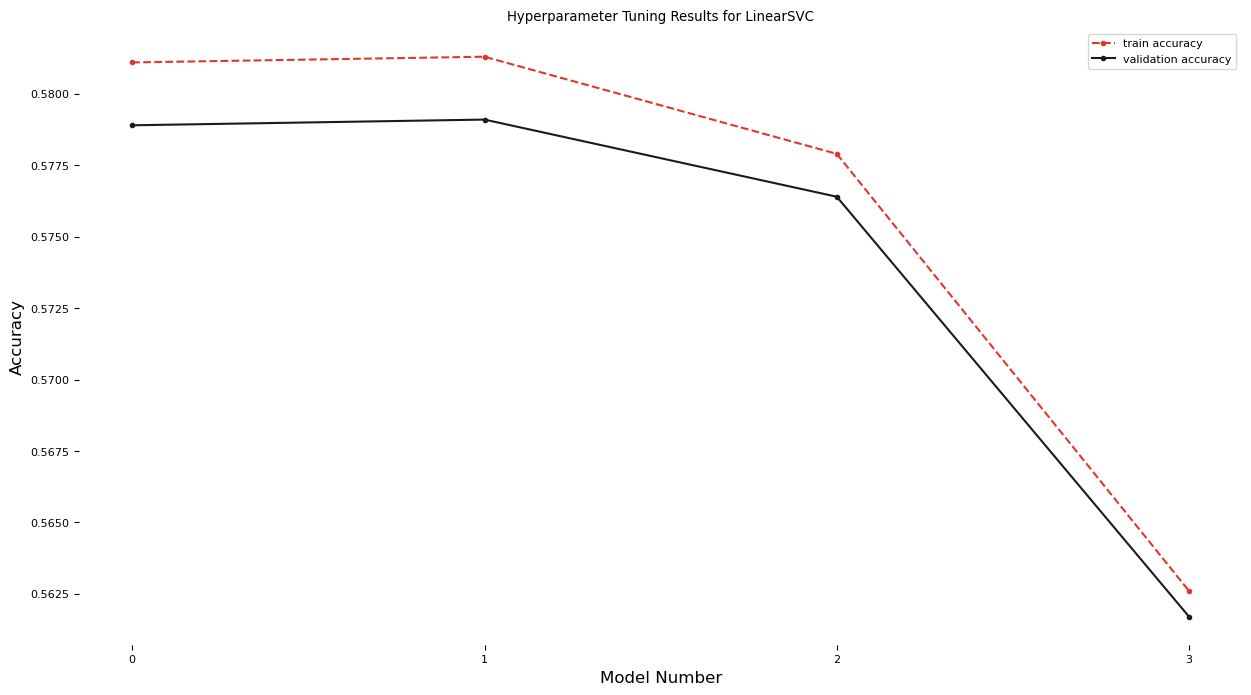


Highest Test Accuracy


C                 0.1000
train accuracy    0.5813
test accuracy     0.5791
Name: 1, dtype: float64

In [ ]:
hyperparameters = {'C': [1, 0.1, 0.01, 0.001]}
model_eval(model = 'LinearSVC', param = hyperparameters)

<hr>

**LinearSVC**

The researchers tested the hyperparameter `C`, which is a regularization parameter for this linear classifier. Upon analyzing the results, even when tested with a low regularization parameter (high value for `C`), it yielded very low train and test accuracy (underfitting), approximately 0.5813 and 0.5791 respectively. These accuracies did not surpass the base accuracy (PCC) of 62.5. **This finding also suggests to researchers that the classification of adware and benign samples necessitates complex boundaries and is not linearly separable.**

100%|██████████| 5/5 [01:31<00:00, 18.28s/it]


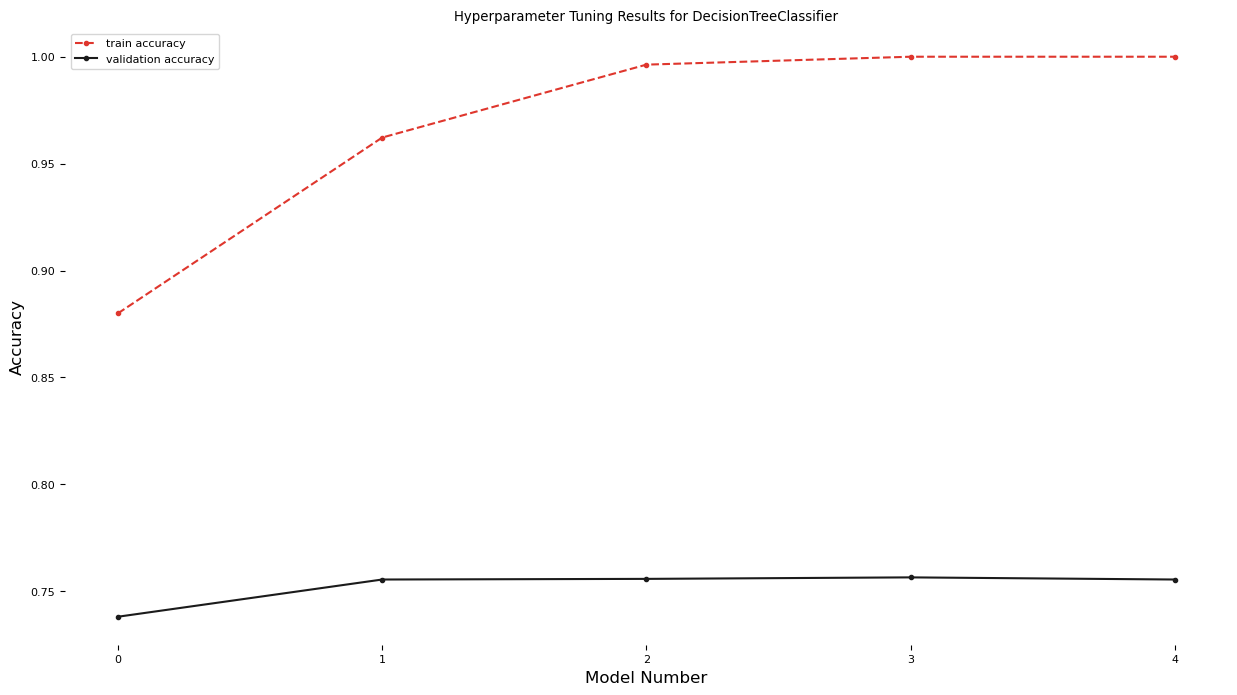


Highest Test Accuracy


max_depth         100.0000
train accuracy      1.0000
test accuracy       0.7565
Name: 3, dtype: float64

In [ ]:
hyperparameters = {'max_depth': [20, 30, 50, 100, None]}
model_eval(model = 'DecisionTreeClassifier', param = hyperparameters)

<hr>

**Decision Tree**

The researchers conducted experiments to assess the impact of the `max_depth` hyperparameter on pruning the decision tree. They observed that as the model number increased, the corresponding `max_depth` also increased. Interestingly, the decision tree's accuracy reached a stable point around model numbers 3 and 4. This led them to identify the optimal value for `max_depth` as **100**, which achieved the highest validation/test accuracy of 0.7565. This particular value will be used for further validation. Furthermore, the researchers noticed an overfitting, as indicated by a notable difference between the train and validation accuracy. **However, it is noteworthy that the validation accuracy surpassed the baseline provided by the PCC.**

100%|██████████| 8/8 [51:35<00:00, 386.99s/it]


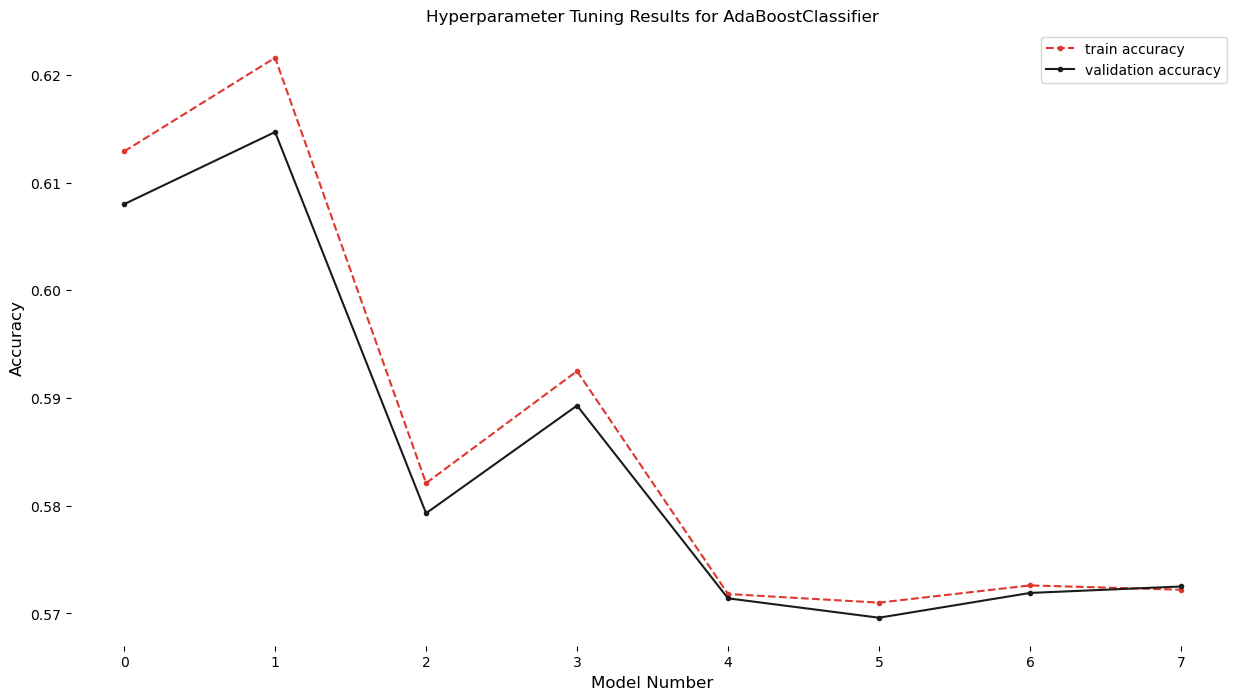


Highest Test Accuracy


learning_rate       1.0000
n_estimators      100.0000
train accuracy      0.6216
test accuracy       0.6147
Name: 1, dtype: float64

In [ ]:
hyperparameters = {'learning_rate': [1.0, 0.1, 0.01, 0.001],
                   'n_estimators': [50, 100]}
model_eval(model = 'AdaBoostClassifier', param = hyperparameters)

<hr>

**AdaBoost**

Based on the `Adaboost` highest test results with a learning_rate of 1.0 and n_estimators of 100, we observe the following:

- The train accuracy is 0.6216, which indicates that the Adaboost model performs slightly worst than the Proportion Chance Criterion on the training data. This suggests that the model is learning some patterns and achieving a higher accuracy than random chance.

- The test accuracy is 0.6147, which is slightly lower than the train accuracy. It indicates that the model's performance on validation set is slightly lower than on the training data. However, it is still comparable to the Proportion Chance Criterion.

- Considering that the Proportion Chance Criterion is 62.5%, the `Adaboost` model's performance is relatively close to the baseline. It suggests that the model is able to capture some discriminatory patterns between android adware and benign classes.

Therefore, based on the provided information, the Adaboost model's performance can be considered moderate or fair, as it shows a slight improvement over random chance.

100%|██████████| 18/18 [37:11<00:00, 123.95s/it]


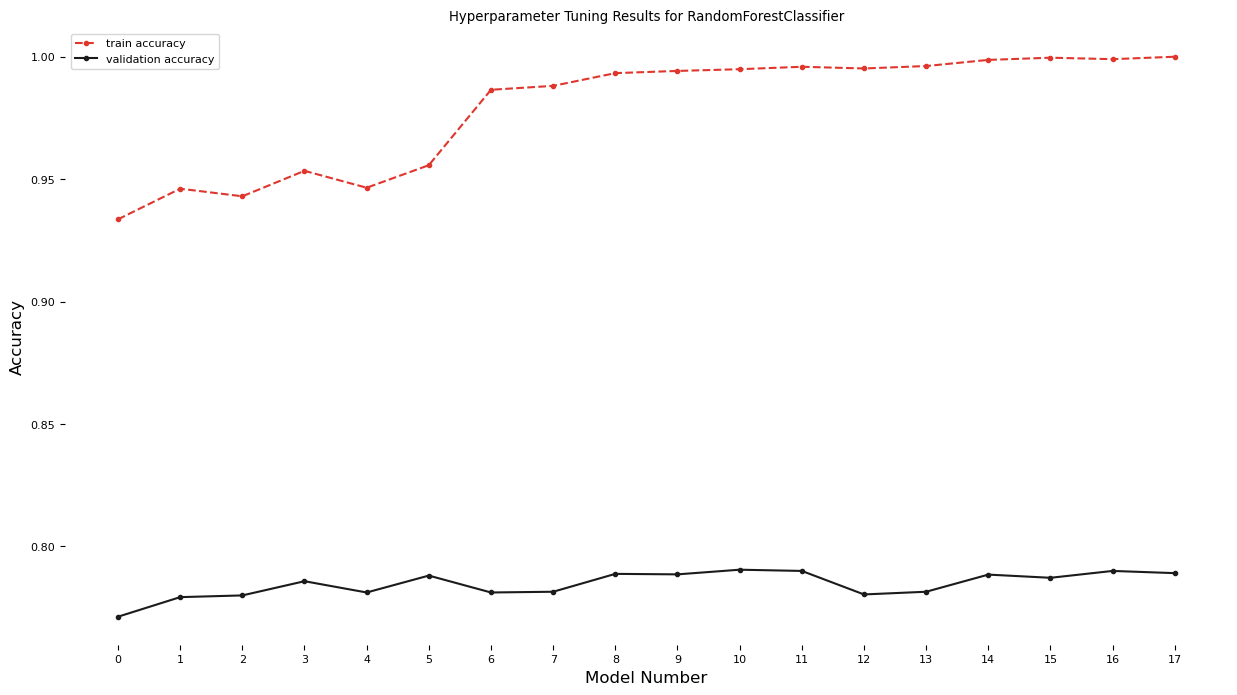


Highest Test Accuracy


max_depth           30.0
n_estimators       100.0
max_features        sqrt
train accuracy    0.9949
test accuracy     0.7905
Name: 10, dtype: object

In [ ]:
hyperparameters = {'max_depth': [20, 30, None],
                   'n_estimators': [20, 50, 100],
                   'max_features': ['sqrt', None]}
model_eval(model = 'RandomForestClassifier', param = hyperparameters)

<hr>

**Random Forest**

The researcher conducted experiments to assess the impact of three hyperparameters on ensemble learning using the Random Forest algorithm. These hyperparameters, namely ```max_depth```, ```n_estimators```, and ```max_features```, were tested to determine their influence on the model's performance. Notably, when compared to other models such as *LinearSVC* and *AdaBoost*, the Random Forest model with the specified hyperparameters produced favorable results. Analysis of the provided plot revealed that the training accuracy of the model converged at model number 6. Among the tested hyperparameter values, the combination ```max_depth=30```, ```n_estimators=100```, and ```max_features='sqrt'``` yielded the highest validation/test accuracy.

### 4.5.2 Optimal Parameters

| Model         | Best Hyperparamter     | Validation Accuracy |
|--------------|-----------|------------|
| K-Nearest Neighbor | n_neighbors = 1, p = 1, weights = 'distance'      | *0.7561*        |
| LinearSVC      | C = 0.1  | 0.5791 |
| Decision Tree      | max_depth = 100  | 0.7565       |
| AdaBoost      | learning_rate = 1.0  | 0.6147       |
| Random Forest      | max_depth = 100, n_estimators = 100, max_features = 'sqrt'  | 0.7905       |

<hr>

The table above illustrates the best hyperparameters and validation accuracies for various models, including *K-Nearest Neighbor*, *LinearSVC*, *Decision Tree*, *AdaBoost*, and *Random Forest*.

- *K-Nearest Neighbor* achieved a validation accuracy of 0.7561 using the hyperparameters `n_neighbors = 1, p = 1, and weights = 'distance'`.

- *LinearSVC* obtained a validation accuracy of 0.5791 with a regularization parameter `(C) set to 0.1`.

- The *Decision Tree* model obtained a validation accuracy of 0.7565, setting the `maximum depth to 100`.

- *AdaBoost* achieved a validation accuracy of 0.6147 with a `learning rate = 1.0`.

- Lastly, *Random Forest* achieved the highest validation accuracy of 0.7905 by utilizing the hyperparameters `max_depth = 100, n_estimators = 100, and max_features = 'sqrt'`.

The researchers will employ these best hyperparameters for each model to evaluate their performance on unseen test data.

## 4.6 Model Evaluation (```Holdout-set Evaluation```)



In [ ]:
def model_scores(*final_models, show_plot = False):
    """
        Calculates the model's scores which are Accuracy, F1-Score, Specificity and Error Rate using holdout test set.

        Parameters
        ------------
        fitted_models : sklearn.base.BaseEstimator or object
              a list that contains the models that'll be used to calculate the scores, the models must contain the optimal parameters.

        Returns
        ------------
        model_scores_ : pandas.core.frame.DataFrame
              a dataframe that contains the models and their corresponding test scores
    """

    # the data frame to store the results of each modol
    model_scores_ = pd.DataFrame()
    model_scores_.columns.name = 'Test Results'

    # create the columns for the model and for the performance measures that we are gonna use to assess the model
    model_scores_['Model'], model_scores_['Accuracy'], model_scores_['F1-Score'], model_scores_['Specificity'], model_scores_['Error Rate']  = [], [], [], [], []


    for model_ in tqdm(final_models):
        model_.fit(X_train, y_train)
        y_pred = model_.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        error_rate = (fn + fp) / (tn + fp + fn + tp)

        model_scores_ = model_scores_.append({'Model':model_.__class__.__name__,
                                              'Accuracy':model_.score(X_test, y_test),
                                              'F1-Score':f1_score(y_test, y_pred),
                                              'Specificity':specificity,
                                             'Error Rate':error_rate}, ignore_index=True)
    print()
    if show_plot:
        plot_df = pd.melt(model_scores_, id_vars=['Model'])
        plot_df.rename({"variable":"Metric", "value":"Score"}, axis=1, inplace=True)

        sns.catplot(x='Score', y='Model', hue='Metric', data=plot_df, kind='bar', orient='h', palette = 'rocket')
        plt.title("Model Evaluation Results")
        plt.show()

    print()
    return model_scores_

100%|██████████| 5/5 [00:18<00:00,  3.70s/it]


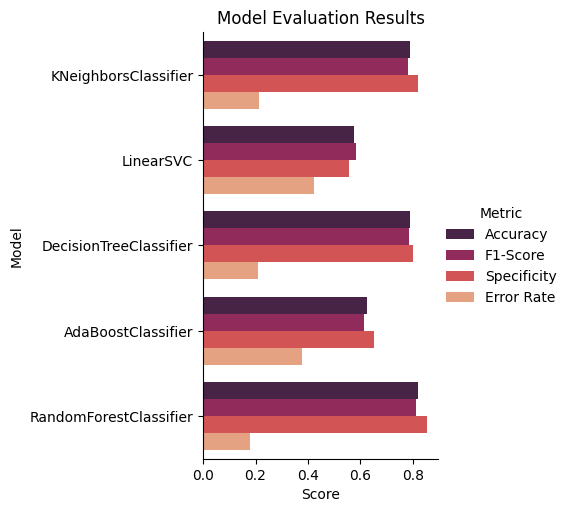

,Model,Accuracy,F1-Score,Specificity,Error Rate
0,KNeighborsClassifier,0.788088,0.781451,0.818458,0.211912
1,LinearSVC,0.576514,0.584575,0.557112,0.423486
2,DecisionTreeClassifier,0.788848,0.786525,0.799730,0.211152
3,AdaBoostClassifier,0.623587,0.612337,0.652607,0.376413
4,RandomForestClassifier,0.819808,0.813547,0.853383,0.180192


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'distance', n_jobs=-1)
linearsvc_classifier = LinearSVC(C = 0.1)
tree_classifier = DecisionTreeClassifier(max_depth = 100, criterion = 'entropy')

ada_classifier = AdaBoostClassifier(learning_rate = 1, n_estimators = 100)
forest_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 30, max_features = 'sqrt', n_jobs=-1)

model_scores(knn_classifier,
             linearsvc_classifier,
             tree_classifier,
             ada_classifier,
             forest_classifier,
             show_plot = True)

**Findings:**

- The researchers employed a hold-out set to evaluate the models using their respective hyperparameters. Upon analyzing the plot presented above, the evaluation results align with the findings of hyperparameter tuning. The model that outperformed the others in terms of *Accuracy*, *F1-Score*, *Specificity*, and exhibited the lowest *Error Rate* was the `RandomForestClassifier`.

- Notably, the `DecisionTreeClassifier` displayed a slightly higher accuracy compared to the `KNeighborsClassifier`. However, the `KNeighborsClassifier` exhibited superior performance in classifying negative values as its *Specificity* was greater than that of the `DecisionTreeClassifier`.

# 5 Results and Discussion

**Plotting Feature Importance for the Best Classifier - RandomForestClassifier**

In [ ]:
def plot_feature_importances(model):
    """
        plots the random forest's feature importance using bar graph.

        Parameters
        ------------
        model : sklearn.base.BaseEstimator
              the scikit-learn model to plot its feature importance

        Returns
        ------------
        None
    """

    n_features = X.shape[1]
    print(X.shape)

    # get the random forest feature importances and its corresponding columns
    results = {column:value for value, column in zip(model.feature_importances_, X.columns)}

    # sort the previous results
    sorted_results = {column:value for column, value in sorted(results.items(), key = lambda x: x[1])}

    plt.barh(range(len(sorted_results.values())), sorted_results.values(), align='center')
    plt.yticks(range(len(sorted_results.values())), sorted_results.keys())

    plt.title("Random Forest: Feature Importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

(47416, 14)


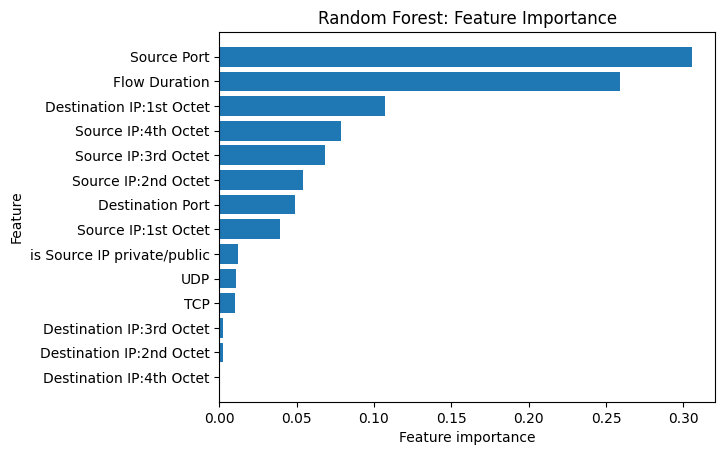

In [ ]:
plot_feature_importances(forest_classifier)

**Observations**

Feature importances are provided by the fitted attribute ```feature_importances_``` and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

The feature ```Source Port``` is the most important feature in terms of impurity, followed by the two features, ```Flow Duration``` and ```Destination IP:1st Octet```.

The researchers also analyzed that a significant portion of the feature importance is shared among all the octets of the `Source IP`. This finding implies that all four segments of the `Source IP` address play a crucial role in the best classifier.

**SHAP**

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see [papers](https://github.com/slundberg/shap#citations) for details and citations). (Lundberg, 2020)

In [ ]:
unscaled_X_train, unscaled_X_test = unscaled_splits[0:2]

types_dict = {'is Source IP private/public':int
                ,'Source IP:1st Octet':int
                ,'Source IP:2nd Octet':int
                ,'Source IP:3rd Octet':int
                ,'Source IP:4th Octet':int
                ,'Destination IP:1st Octet':int
                ,'Destination IP:2nd Octet':int
                ,'Destination IP:3rd Octet':int
                ,'Destination IP:4th Octet':int}

# change the astypes of the unscaled splits from object to int
unscaled_X_train = X_train.astype(types_dict)
unscaled_X_test = X_test.astype(types_dict)

explainer = shap.TreeExplainer(forest_classifier, unscaled_X_test)

values = explainer.shap_values(unscaled_X_test, check_additivity=False)

**SHAP - Benign Classification**

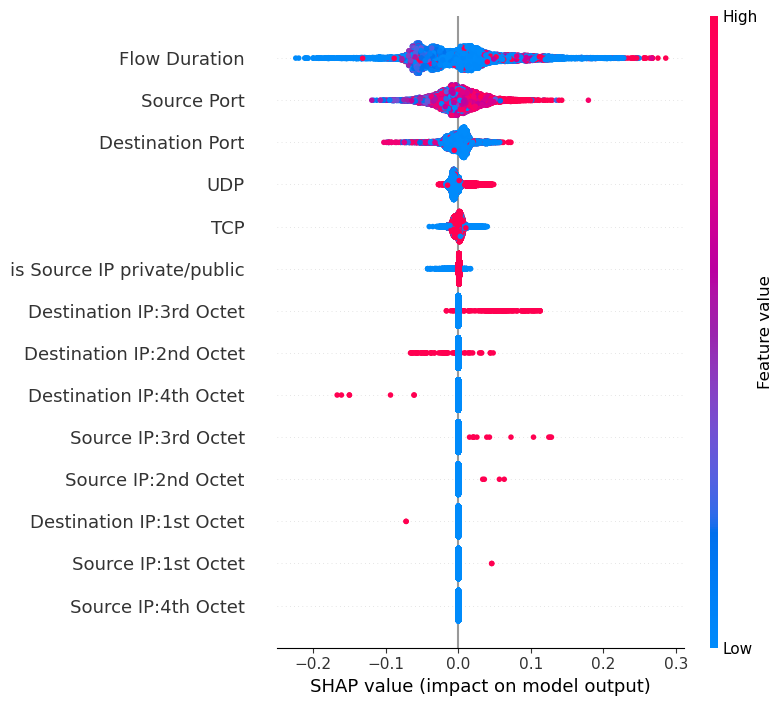

In [ ]:
# selecting the first array from the variable values. values[0] = benign classification
shap.summary_plot(values[0], unscaled_X_test)

**SHAP - Adware Classification**

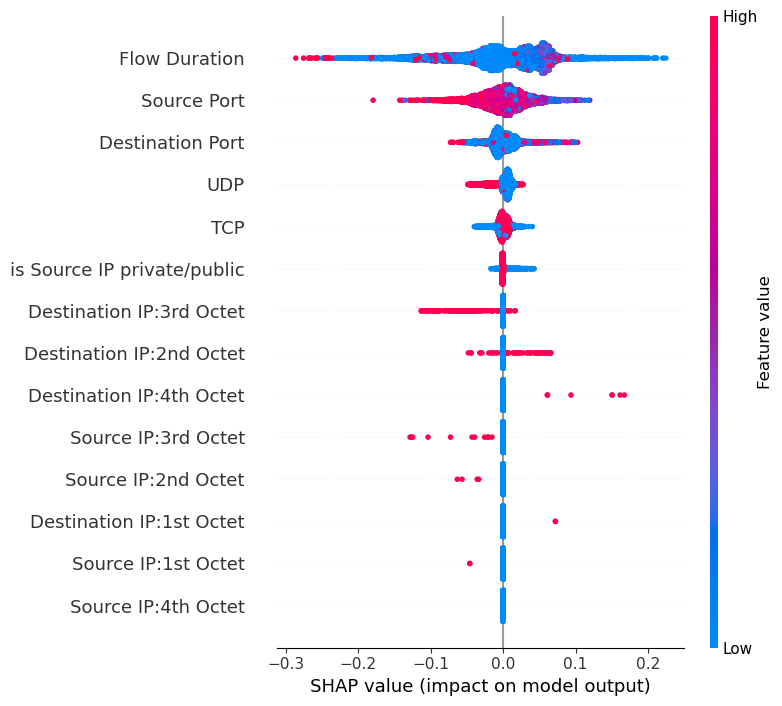

In [ ]:
# selecting the second array from the variable values. values[1] = adware classification
shap.summary_plot(values[1], unscaled_X_test)

**Interpreting the SHAP `summary_plot` of the best classifier (Random Forest)**

- The SHAP `summary_plot` of the top-performing classifier (Random Forest) provides insights into the impact of features on the model's predictions. The vertical position of features on the left y-axis indicates their level of influence on the model's output. Dots that are more spread out from the center represent a higher magnitude of both positive and negative impacts on the model's predictions.

- Furthermore, the color gradient in the plot provides information about the feature values. When the color tends towards red, it indicates a high feature value, while a tendency towards blue represents a low feature value.

- Positive SHAP values indicate features that positively contribute to the final prediction, while negative SHAP values indicate features that have a negative influence on the prediction. For example, in the adware classification, a high value of the "Source Port" feature corresponds to a negative SHAP value, indicating that it leans towards the benign category. This conclusion is supported by the `summary_plot` from the benign classification as well.

**Benign classification**

- Considering the information provided, the researchers identified that `Flow Duration` has the most significant impact on the model's prediction in the benign classification. The SHAP values for this feature are scattered across both positive and negative values. Higher values of `Flow Duration` positively influence the model's prediction, while lower values have a negative influence.

**Adware classification**

- Analyzing the `summary_plot` for the adware classification, the order of features on the left y-axis remains the same. `Flow Duration` continues to have the most significant impact on the model's prediction, with SHAP values scattered across both positive and negative values. However, in contrast to the benign classification, higher values of `Flow Duration` now lead to a negative influence, resulting in a prediction leaning towards the benign category. Conversely, lower values of `Flow Duration` have a positive influence on the prediction.

# 6 Conclusion

Adware, a harmful software, has become a significant concern in the digital world. It poses threats by displaying unwanted ads, stealing user data, compromising privacy, and creating vulnerabilities for further adware and malware installations. This project aims to predict adware applications on mobile phones by creating a machine-learning model that can accurately distinguish adware applications from safe ones. The results of the analysis are as follows:

- After exploring the data, it was noted that adware and benign samples share many similarities in most features. However, there were some cases where the flow duration in benign samples was longer compared to adware samples. This suggests that the flow durations in benign samples are more spread out than in adware samples.

- The baseline test accuracy was 62.5%. The findings suggest that most machine learning models performed better than this baseline accuracy, except for Adaboost and LinearSVC. The Random Forest classifier displayed the greatest accuracy of all the models examined.

- Based on our analysis, the Random Forest classifier with hyperparameters `max_depth = 100, n_estimators = 100, max_features = 'sqrt'`, had the highest test accuracy among all the classifiers, achieving 81.66%. It also had a high F1-Score of 81.01%, indicating a good balance between precision and recall. In addition, the Random Forest Classifier had a high specificity of 85.07%, which suggests a low false positive rate. Overall, the Random Forest classifier outperformed all other classifiers regarding accuracy.

- Random Forest analysis revealed that the Source Port feature is the most important in impurity, followed by Flow Duration and Destination IP: 1st Octet. This indicates that Source Port is a critical factor in distinguishing between adware and non-adware instances. On the other hand, the SHAP analysis identified "flow_duration" as the most influential feature in the classification process.

In summary, distinguishing between adware and safe applications can be difficult because they share similarities. Fortunately, machine learning has made it possible to identify distinct features that help differentiate between them. Among these, flow duration and source port are particularly effective in clearly separating adware applications.


# 7 References

Chakraborty, S. (2022) *Android Malware Detection* Retrieved from: https://www.kaggle.com/datasets/subhajournal/android-malware-detection

Arash Habibi Lashkari, Andi Fitriah A. Kadir, Laya Taheri, and Ali A. Ghorbani (2018) *Android Malware Dataset (CIC-AndMal2017)* Retrieved from: https://www.unb.ca/cic/datasets/andmal2017.html

Mitchell, B. (2021) *The use of octets in computers and Networking, Lifewire.* Retrieved from: https://www.lifewire.com/what-is-octet-818391

Lundberg, S. (Feb 2020). *SHAP Documentation* Retrieved from: https://shap.readthedocs.io/en/latest/index.html

Callaham, J. (2018, August 6). The history of Android OS: its name, origin and more. Android Authority. https://www.androidauthority.com/history-android-os-name-789433/

Gao, J., Li, L., Kong, P., Bissyande, T. F., & Klein, J. (2019). Should You Consider Adware as Malware in Your Study? 2019 IEEE 26th International Conference on Software Analysis, Evolution and Reengineering (SANER). https://doi.org/10.1109/saner.2019.8668010

Kaspersky Lab. (2021, May 26). The number of new malicious files detected every day increases by 5.2% to 360,000 in 2020. Www.kaspersky.com. https://www.kaspersky.com/about/press-releases/2020_the-number-of-new-malicious-files-detected-every-day-increases-by-52-to-360000-in-2020

Laricchia, F. (2019, June 29). Mobile OS market share 2019 | Statista. Statista; Statista. https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009/

Statista. (2023). Distribution of free and paid Android apps 2020. Statista. https://www.statista.com/statistics/266211/distribution-of-free-and-paid-android-apps/

Statistica. (2022). Topic: Mobile app usage. Statista; L. Ceci. https://www.statista.com/topics/1002/mobile-app-usage/#topicOverview